In [1]:
import sys
import numpy as np
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras 
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from tensorflow.keras.models import load_model
import helper_functions as f

2023-07-31 14:09:21.722555: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-31 14:09:21.760199: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 14:09:21.898531: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-31 14:09:21.899220: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-31 14:09:22.678290: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

In [4]:
wireplane = 'U'

In [7]:
model_5_10_mean = np.load('../models_scales/mean_5_10' + wireplane + '_nu.npy')
model_5_10_std = np.load('../models_scales/scale_5_10' + wireplane + '_nu.npy')

model_5_15_mean = np.load('../models_scales/mean_5_15' + wireplane + '_nu.npy')
model_5_15_std = np.load('../models_scales/scale_5_15' + wireplane + '_nu.npy')

model_5_18_mean = np.load('../models_scales/mean_5_18' + wireplane + '_nu.npy')
model_5_18_std = np.load('../models_scales/scale_5_18' + wireplane + '_nu.npy')

model_60k_mean = np.load('../models_scales/mean_60k' + wireplane + '_nu.npy')
model_60k_std = np.load('../models_scales/scale_60k' + wireplane + '_nu.npy')

In [8]:
scalers = [[model_5_10_mean, model_5_10_std], [model_5_15_mean, model_5_15_std], 
           [model_5_18_mean, model_5_18_std], [model_60k_mean, model_60k_std]]

In [9]:
model_5_10 = load_model('../ROI_ar39_models/model_5_10' + wireplane + 'plane_nu_ROI.h5')

model_5_15 = load_model('../ROI_ar39_models/model_5_15' + wireplane + 'plane_nu_ROI.h5')

model_5_18 = load_model('../ROI_ar39_models/model_5_18' + wireplane + 'plane_nu_ROI.h5')

model_60k = load_model('../ROI_ar39_models/model_60k' + wireplane + 'plane_nu_ROI.h5')

2023-07-25 21:34:48.826175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-25 21:34:48.864707: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-07-25 21:34:48.865081: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [10]:
models = [model_5_10, model_5_15, model_5_18, model_60k]

In [11]:
noise_path = '/home/vlian/Workspace/noise_100k_for_test/U/'
noise_filenames = sorted([f for f in listdir(noise_path) if (isfile(join(noise_path, f)) and wireplane in f)])
combined_noise = np.concatenate([np.load(noise_path+fname, mmap_mode='r') for fname in noise_filenames])

noise_waveforms = f.get_std_waveforms(combined_noise, 200)
roi_truth_noise = np.zeros(noise_waveforms.shape[0]) # for autoencoder
print(noise_waveforms.shape, roi_truth_noise.shape)

(100000, 200) (100000,)


In [12]:
def eval_model(idx):
    model_idx = idx

    noise_scaled = (noise_waveforms-scalers[model_idx][0])/scalers[model_idx][1]
    infer = models[model_idx].predict(noise_scaled)
    
    print((1-(len([i for i in infer if i >= 0.94])/len(infer)))*100)

In [53]:
for i in range(4):
    print('model:', i)
    eval_model(i)

model: 0
3125/3125 [==============================] - 4s 1ms/step
99.514
model: 1
3125/3125 [==============================] - 4s 1ms/step
99.456
model: 2
3125/3125 [==============================] - 4s 1ms/step
99.60900000000001
model: 3
3125/3125 [==============================] - 4s 1ms/step
99.735


In [14]:
dataset_adc_5_16 = np.load('/home/vlian/Workspace/ar39_samples/adc_5_16_U.npz', allow_pickle=True)

In [15]:
adc_5 = dataset_adc_5_16['adc_5']
adc_6 = dataset_adc_5_16['adc_6']
adc_7 = dataset_adc_5_16['adc_7']
adc_8 = dataset_adc_5_16['adc_8']
adc_9 = dataset_adc_5_16['adc_9']
adc_10 = dataset_adc_5_16['adc_10']
adc_11 = dataset_adc_5_16['adc_11']
adc_12 = dataset_adc_5_16['adc_12']
adc_13 = dataset_adc_5_16['adc_13']
adc_14 = dataset_adc_5_16['adc_14']
adc_15 = dataset_adc_5_16['adc_15']
adc_16 = dataset_adc_5_16['adc_16']

In [16]:
def cut_data(adc_group, type_):
    if type_:
        num_samples = 100000
    else:
        num_samples = 60000
    
    x = adc_group[0][0:num_samples]
    y = adc_group[1][0:num_samples]
    
    print(x.shape, y.shape)
    
    return x, y

In [17]:
adc_5_x, adc_5_y = cut_data(adc_5, True)
adc_6_x, adc_6_y = cut_data(adc_6, True)
adc_7_x, adc_7_y = cut_data(adc_7, True)
adc_8_x, adc_8_y = cut_data(adc_8, True)
adc_9_x, adc_9_y = cut_data(adc_9, True)
adc_10_x, adc_10_y = cut_data(adc_10, True)
adc_11_x, adc_11_y = cut_data(adc_11, True)
adc_12_x, adc_12_y = cut_data(adc_12, True)
adc_13_x, adc_13_y = cut_data(adc_13, True)

adc_14_x, adc_14_y = cut_data(adc_14, True)
adc_15_x, adc_15_y = cut_data(adc_15, True)
adc_16_x, adc_16_y = cut_data(adc_16, True)

(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(100000, 200) (100000, 200)
(86292, 200) (86292, 200)
(64095, 200) (64095, 200)


In [18]:
signals_per_adc = [adc_5_x, adc_6_x, adc_7_x, adc_8_x, adc_9_x, adc_10_x, adc_11_x, adc_12_x, adc_13_x, adc_14_x, adc_15_x, adc_16_x]

In [19]:
def eval_model_adc(adc_group_waveforms, model_idx):

    waveforms_scaled = (adc_group_waveforms-scalers[model_idx][0])/scalers[model_idx][1]
    infer = models[model_idx].predict(waveforms_scaled)
    
    print((len([i for i in infer if i >= 0.94])/len(infer))*100)

In [52]:
for i, signals_at_adc in enumerate(signals_per_adc):
    print('adc:', i+5)
    for j in range(4):
        print('    model:', j) 
        eval_model_adc(signals_at_adc, j)
    print('--------------')

adc: 5
    model: 0
3125/3125 [==============================] - 4s 1ms/step
5.086
    model: 1
3125/3125 [==============================] - 4s 1ms/step
5.631
    model: 2
3125/3125 [==============================] - 4s 1ms/step
4.462
    model: 3
3125/3125 [==============================] - 4s 1ms/step
3.573
--------------
adc: 6
    model: 0
3125/3125 [==============================] - 4s 1ms/step
9.279
    model: 1
3125/3125 [==============================] - 4s 1ms/step
10.120999999999999
    model: 2
3125/3125 [==============================] - 4s 1ms/step
8.372
    model: 3
3125/3125 [==============================] - 4s 1ms/step
6.909
--------------
adc: 7
    model: 0
3125/3125 [==============================] - 4s 1ms/step
15.787
    model: 1
3125/3125 [==============================] - 4s 1ms/step
16.808
    model: 2
3125/3125 [==============================] - 4s 1ms/step
14.485999999999999
    model: 3
3125/3125 [==============================] - 4s 1ms/step
12.354
--------

In [24]:
adc_5_16_x = np.empty((0,200))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_5_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_6_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_7_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_8_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_9_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_10_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_11_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_12_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_13_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_14_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_15_x))
adc_5_16_x = np.concatenate((adc_5_16_x, adc_16_x))

In [25]:
for i in range(10):
    adc_5_16_x = shuffle(adc_5_16_x)

In [26]:
for j in range(4):
    print('    model:', j) 
    eval_model_adc(adc_5_16_x, j)

    model: 0
35950/35950 [==============================] - 45s 1ms/step
49.48030532333901
    model: 1
35950/35950 [==============================] - 46s 1ms/step
51.01526703622346
    model: 2
35950/35950 [==============================] - 45s 1ms/step
48.58425903630692
    model: 3
35950/35950 [==============================] - 44s 1ms/step
46.17454821725211


In [27]:
orig_model = load_model('../../ROI_models/model_Uplane_nu_ROI.h5')
mean = np.load('../../ROI_models/mean_U_nu_ROI.npy')
std = np.load('../../ROI_models/scale_U_nu_ROI.npy')

In [54]:
def eval_model_adc_orig(adc_group_waveforms):

    waveforms_scaled = (adc_group_waveforms-mean)/std
    infer = orig_model.predict(waveforms_scaled, verbose=0)
    
    print((len([i for i in infer if i >= 0.94])/len(infer))*100)

In [56]:
for i, signals_at_adc in enumerate(signals_per_adc):
    print('adc:', i+5)
    eval_model_adc_orig(signals_at_adc)
    print('--------------')

adc: 5
1.9040000000000001
--------------
adc: 6
3.804
--------------
adc: 7
7.285
--------------
adc: 8
12.523000000000001
--------------
adc: 9
19.74
--------------
adc: 10
29.064
--------------
adc: 11
39.591
--------------
adc: 12
50.133
--------------
adc: 13
60.568999999999996
--------------
adc: 14
70.114
--------------
adc: 15
78.40703657349465
--------------
adc: 16
85.21101489975817
--------------


In [30]:
eval_model_adc_orig(adc_5_16_x)

35950/35950 [==============================] - 45s 1ms/step
36.24884495391551


In [31]:
eval_model_adc_orig(noise_waveforms)

3125/3125 [==============================] - 4s 1ms/step
0.098


In [32]:
100-(0.098)

99.902

# AE_TEST

In [33]:
model_5_10_AE = load_model('../AE_ar39_models/model_5_10' + wireplane + 'plane_nu_AE.h5')

model_5_15_AE = load_model('../AE_ar39_models/model_5_15' + wireplane + 'plane_nu_AE.h5')

model_5_18_AE = load_model('../AE_ar39_models/model_5_18' + wireplane + 'plane_nu_AE.h5')

model_60k_AE = load_model('../AE_ar39_models/model_60k' + wireplane + 'plane_nu_AE.h5')

In [34]:
cln_signals_per_adc = [adc_5_y, adc_6_y, adc_7_y, adc_8_y, adc_9_y, adc_10_y, adc_11_y, adc_12_y, adc_13_y, adc_14_y, adc_15_y, adc_16_y]

In [43]:
def roi_ae(roi_model, ae_model, roi_scalers, ae_scalers, adc_idx, num_pred):
    waveform_noisy = signals_per_adc[adc_idx]
    noisy_wave_scaled_ROI = (waveform_noisy-roi_scalers[0])/roi_scalers[1]
    noisy_wave_scaled_AE = (waveform_noisy-ae_scalers[0])/ae_scalers[1]
    
    waveform_clean = cln_signals_per_adc[adc_idx]
    clean_wave_scaled = (waveform_clean-ae_scalers[0])/ae_scalers[1]
    counter = 0
    for i in range(100000):
        wave_roi = noisy_wave_scaled_ROI[i:i+1]
        if roi_model.predict(wave_roi) >= -0.94:
            wave_AE = noisy_wave_scaled_AE[i:i+1]
            ae_pred = ae_model(wave_AE)
            pred = ae_pred*ae_scalers[1] + ae_scalers[0]
            
            fig = plt.figure(figsize=(8,2))
            plt.plot(pred[0], color='m', label='pred')
            plt.plot(waveform_clean[i:i+1][0], color='blue', label='target')
            plt.legend()
            plt.show()
            
            counter += 1
            
            if counter >= num_pred:
                break

1/1 [==============================] - 0s 26ms/step


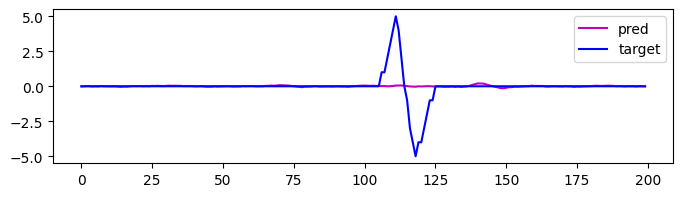

1/1 [==============================] - 0s 30ms/step


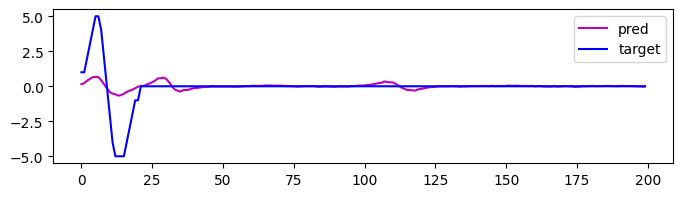

1/1 [==============================] - 0s 24ms/step


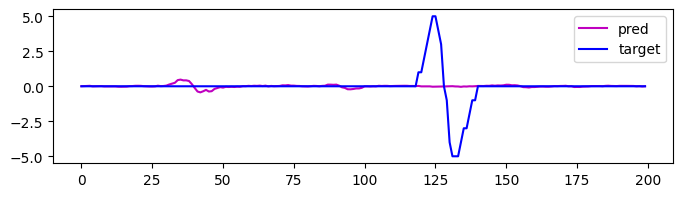

1/1 [==============================] - 0s 24ms/step


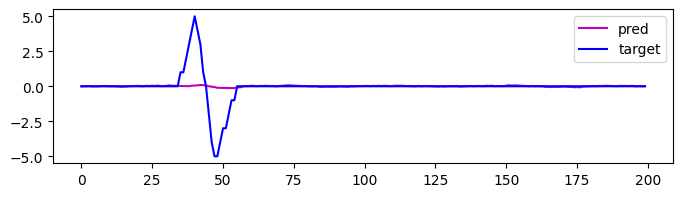

1/1 [==============================] - 0s 32ms/step


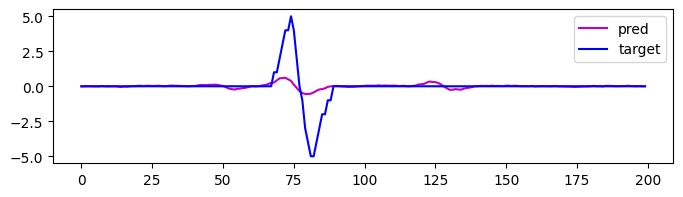

1/1 [==============================] - 0s 24ms/step


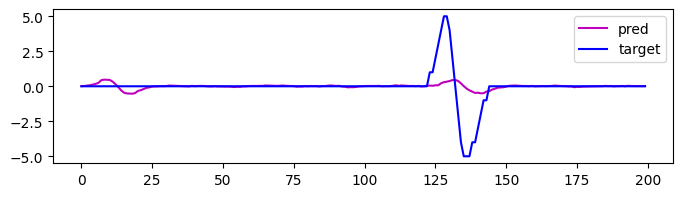

1/1 [==============================] - 0s 20ms/step


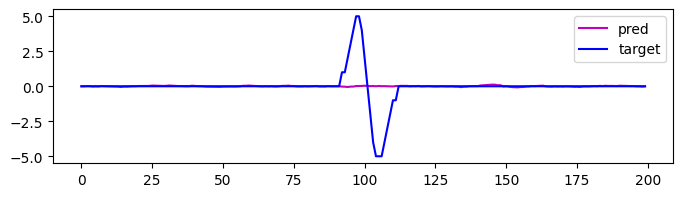

1/1 [==============================] - 0s 21ms/step


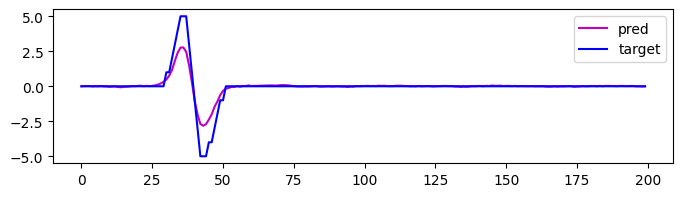

1/1 [==============================] - 0s 21ms/step


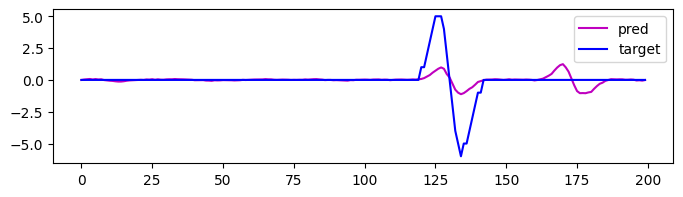

1/1 [==============================] - 0s 22ms/step


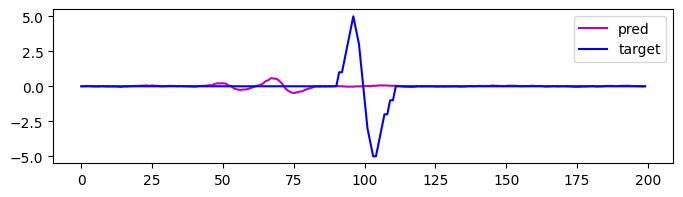

In [57]:
roi_ae(model_60k, model_60k_AE, [model_60k_mean, model_60k_std], [model_60k_mean, model_60k_std], 0, 10)

1/1 [==============================] - 0s 25ms/step


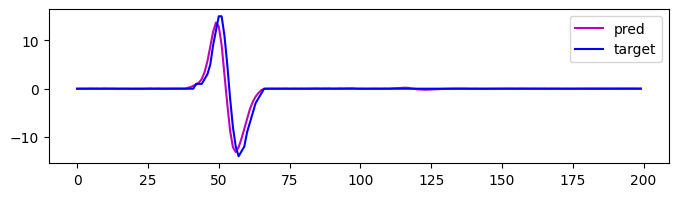

1/1 [==============================] - 0s 28ms/step


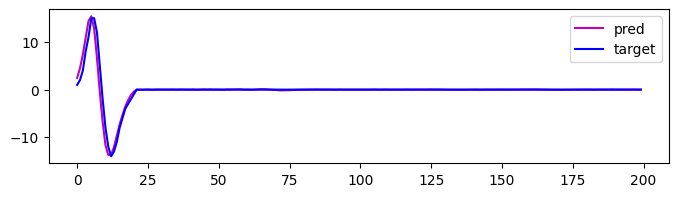

1/1 [==============================] - 0s 28ms/step


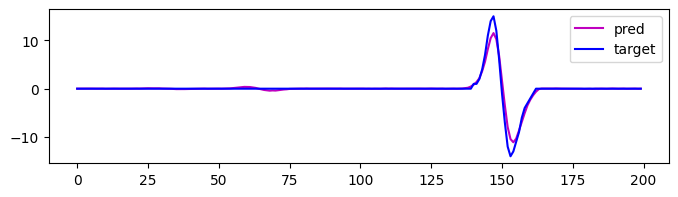

1/1 [==============================] - 0s 26ms/step


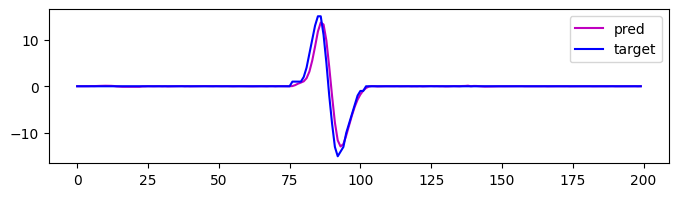

1/1 [==============================] - 0s 28ms/step


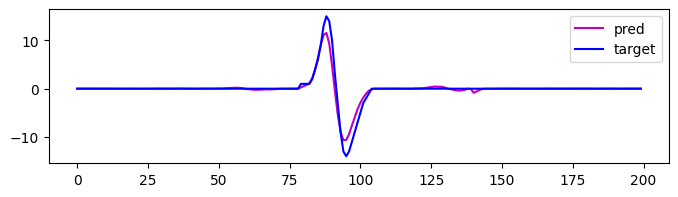

1/1 [==============================] - 0s 28ms/step


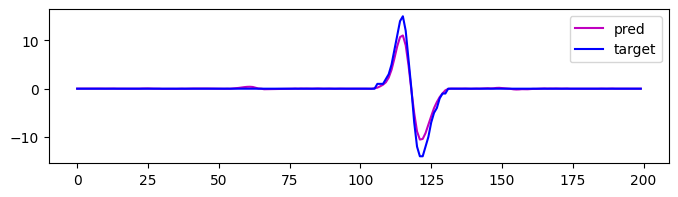

1/1 [==============================] - 0s 30ms/step


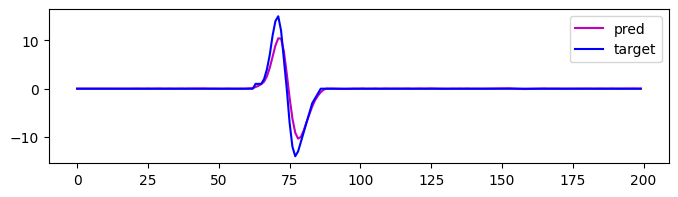

1/1 [==============================] - 0s 28ms/step


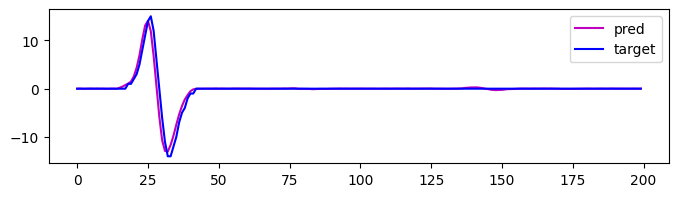

1/1 [==============================] - 0s 24ms/step


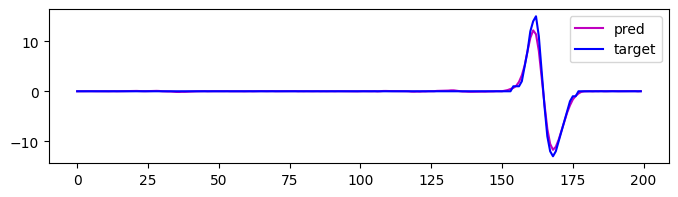

1/1 [==============================] - 0s 29ms/step


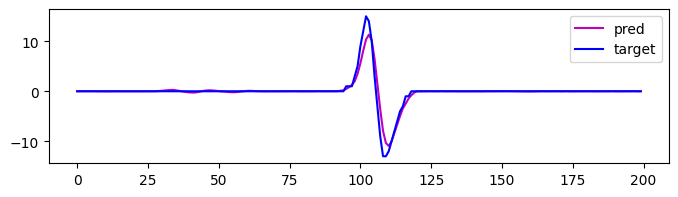

In [48]:
roi_ae(model_5_18, model_5_18_AE, [model_5_18_mean, model_5_18_std], [model_5_18_mean, model_5_18_std], 10, 10)

1/1 [==============================] - 0s 25ms/step
(1, 200)
1/1 [==============================] - 0s 29ms/step
(1, 200, 1)


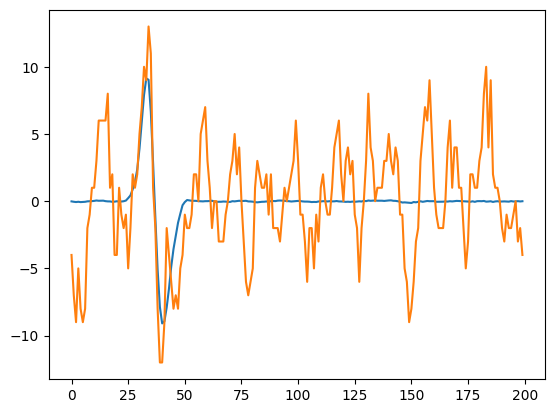

1/1 [==============================] - 0s 26ms/step
(1, 200)
1/1 [==============================] - 0s 33ms/step
(1, 200, 1)


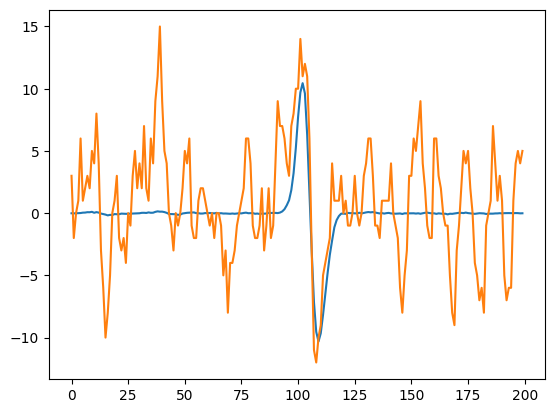

1/1 [==============================] - 0s 23ms/step
(1, 200)
1/1 [==============================] - 0s 24ms/step
(1, 200, 1)


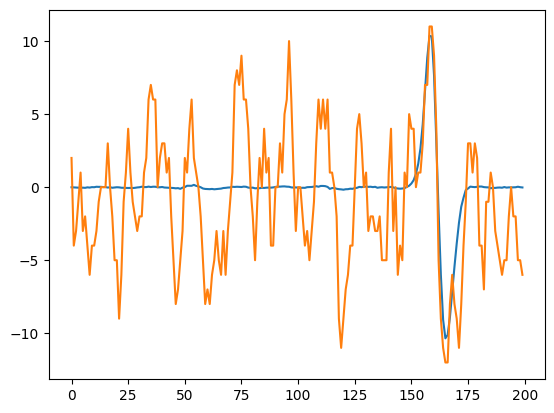

1/1 [==============================] - 0s 24ms/step
(1, 200)
1/1 [==============================] - 0s 26ms/step
(1, 200, 1)


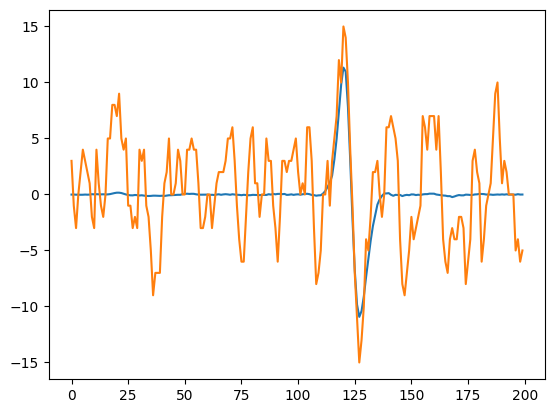

1/1 [==============================] - 0s 22ms/step
(1, 200)
1/1 [==============================] - 0s 22ms/step
(1, 200, 1)


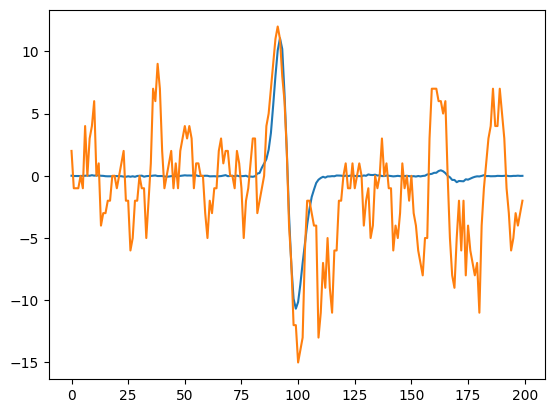

1/1 [==============================] - 0s 20ms/step
(1, 200)
1/1 [==============================] - 0s 21ms/step
(1, 200, 1)


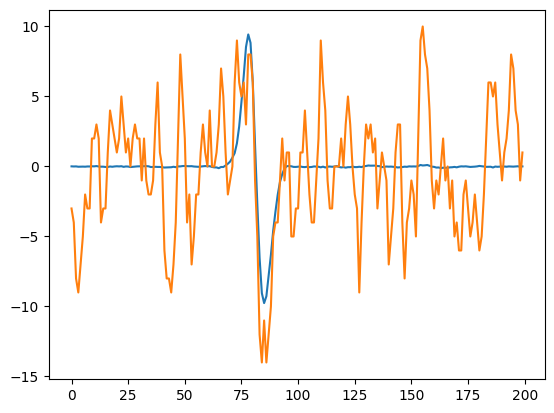

1/1 [==============================] - 0s 20ms/step
(1, 200)
1/1 [==============================] - 0s 23ms/step
(1, 200, 1)


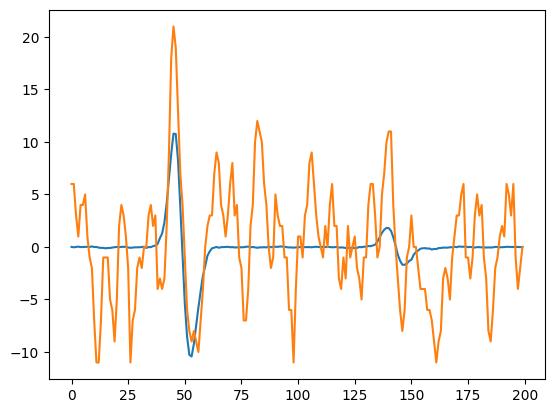

1/1 [==============================] - 0s 69ms/step
(1, 200)
1/1 [==============================] - 0s 25ms/step
(1, 200, 1)


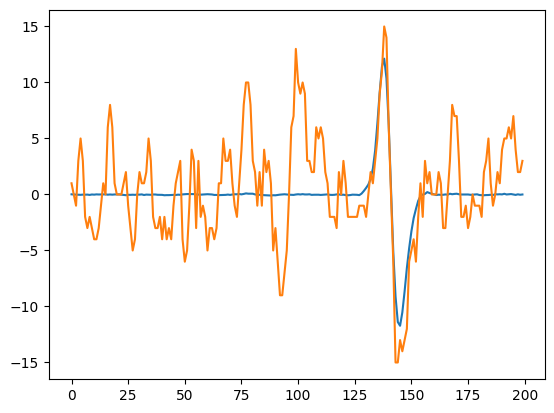

1/1 [==============================] - 0s 21ms/step
(1, 200)
1/1 [==============================] - 0s 20ms/step
(1, 200, 1)


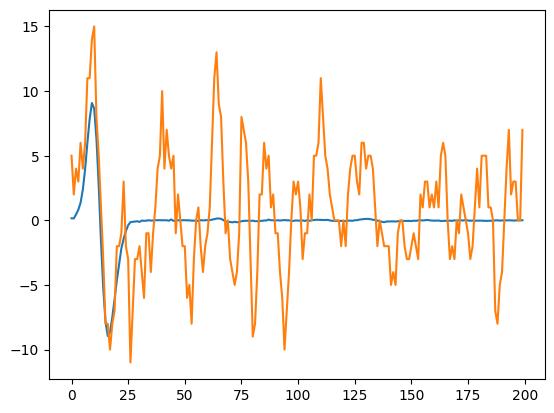

1/1 [==============================] - 0s 20ms/step
(1, 200)
1/1 [==============================] - 0s 19ms/step
(1, 200, 1)


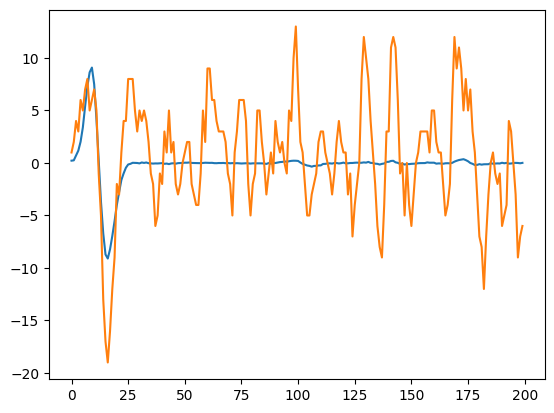

1/1 [==============================] - 0s 18ms/step
(1, 200)
1/1 [==============================] - 0s 19ms/step
(1, 200, 1)


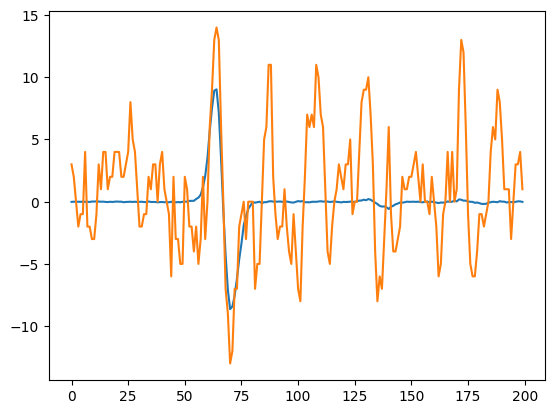

1/1 [==============================] - 0s 18ms/step
(1, 200)
1/1 [==============================] - 0s 21ms/step
(1, 200, 1)


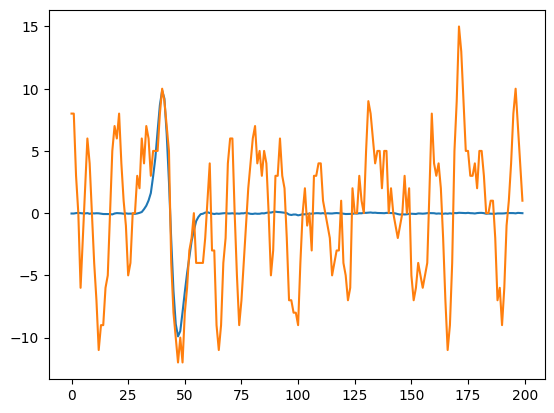

1/1 [==============================] - 0s 17ms/step
(1, 200)
1/1 [==============================] - 0s 18ms/step
(1, 200, 1)


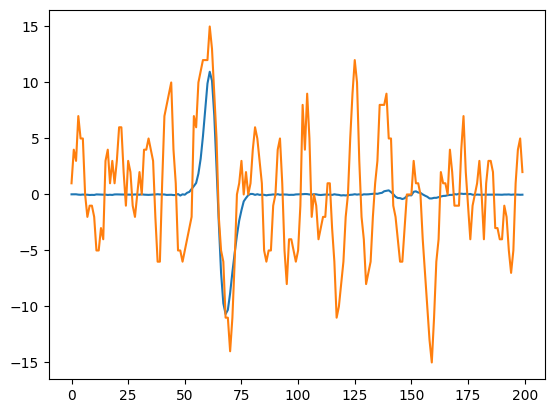

1/1 [==============================] - 0s 22ms/step


In [99]:
data_16_roi_scaled = (adc_7_x-model_5_15_mean)/model_5_15_std
for i in range(100):
    wave = data_16_roi_scaled[i:i+1]
    if model_5_15.predict(wave) >= 0.94:
        print(wave.shape)
        ae_pred = ae.predict(wave)
        print(ae_pred.shape)
        pred = ae_pred*model_5_15_std + model_5_15_mean
        
        wave_re_scaled = wave*model_5_15_std + model_5_15_mean
    
        plt.plot(pred[0])
        plt.plot(wave_re_scaled[0])
        plt.show()
    